/home/.local/lib/python3.12/site-packages/pyworld2/__init__.py


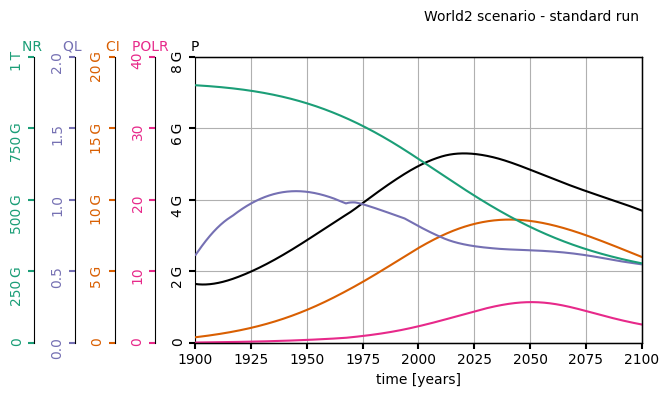

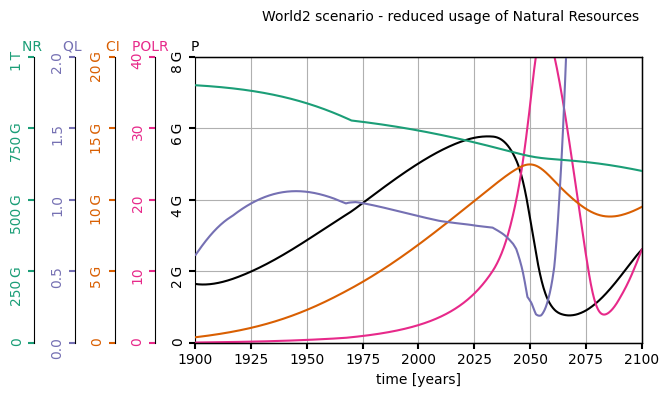

In [1]:
import pyworld2
print(pyworld2.__file__)
pyworld2.hello_world2()

In [3]:
import json
# Smaller birth rate
#read JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parse JSON data as a Python dictionary

# Modify data
data = [{**item, "BRN1": 0.01} if "BRN1" in item else item for item in data]

# Save JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "w", encoding="utf-8") as file:
    json.dump(data, file, indent=4, ensure_ascii=False)


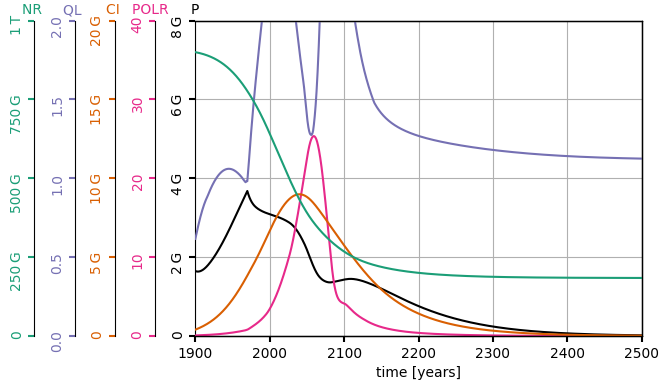

In [4]:
from pyworld2 import World2

w2 = World2(year_min=1900, year_max=2500)
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./pyworld2_main/pyworld2/functions_switch_modified.json")
w2.run()

pyworld2.utils.plot_world_state(w2)

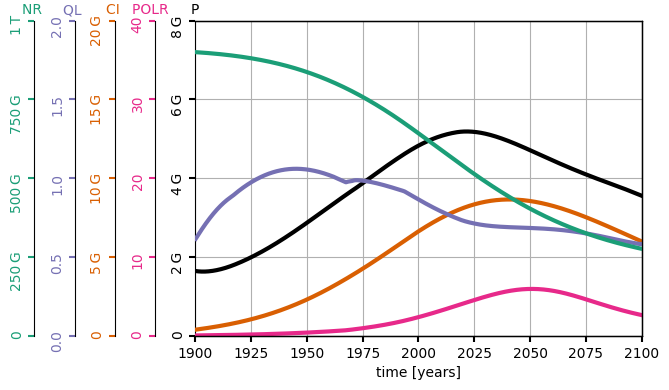

In [17]:
# Larger death rate
#read JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parse JSON data as a Python dictionary

# Modify data
data = [{**item, "BRN1": 0.04, "DRN1": 0.03} if "BRN1" in item or "DRN1" in item else item for item in data]

# Save JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "w", encoding="utf-8") as file:
    json.dump(data, file, indent=4, ensure_ascii=False)

w2 = World2()
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./pyworld2_main/pyworld2/functions_switch_modified.json")
w2.run()

pyworld2.utils.plot_world_state(w2)

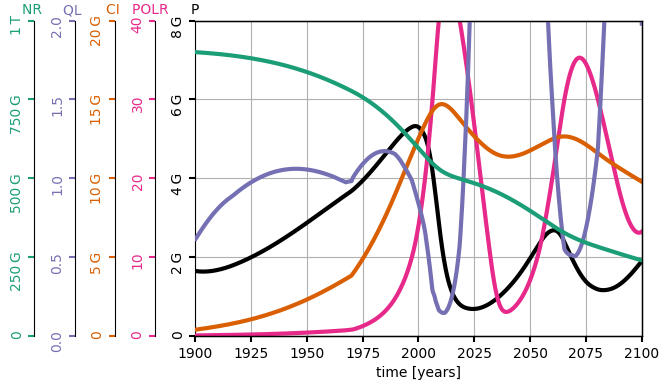

In [19]:
# Larger capital invest genertion rate
#read JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parse JSON data as a Python dictionary

# Modify data
data = [{**item, "DRN1": 0.028, "CIGN1": 0.08} if "DRN1" in item or "CIGN1" in item else item for item in data]

# Save JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "w", encoding="utf-8") as file:
    json.dump(data, file, indent=4, ensure_ascii=False)

w2 = World2()
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./pyworld2_main/pyworld2/functions_switch_modified.json")
w2.run()

pyworld2.utils.plot_world_state(w2)

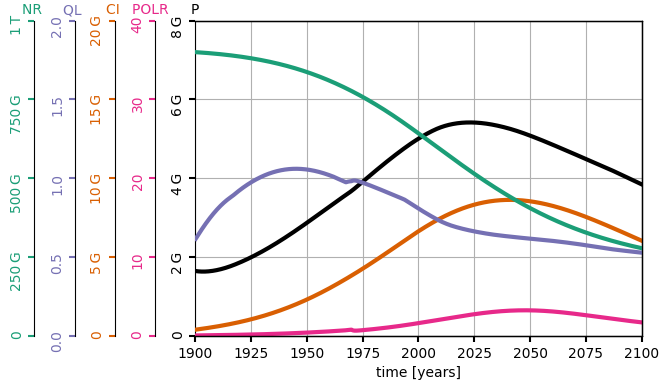

In [20]:
# Smaller pollution rate
#read JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parse JSON data as a Python dictionary

# Modify data
data = [{**item, "CIGN1": 0.05, "POLN1": 0.8} if "CIGN1" in item or "POLN1" in item else item for item in data]

# Save JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "w", encoding="utf-8") as file:
    json.dump(data, file, indent=4, ensure_ascii=False)

w2 = World2()
w2.set_state_variables()
w2.set_initial_state()
w2.set_table_functions()
w2.set_switch_functions("./pyworld2_main/pyworld2/functions_switch_modified.json")
w2.run()

pyworld2.utils.plot_world_state(w2)

In [21]:
#read JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parse JSON data as a Python dictionary

# Modify data
data = [{**item, "POLN1": 1} if "POLN1" in item else item for item in data]

# Save JSON file
with open("pyworld2_main/pyworld2/functions_switch_modified.json", "w", encoding="utf-8") as file:
    json.dump(data, file, indent=4, ensure_ascii=False)

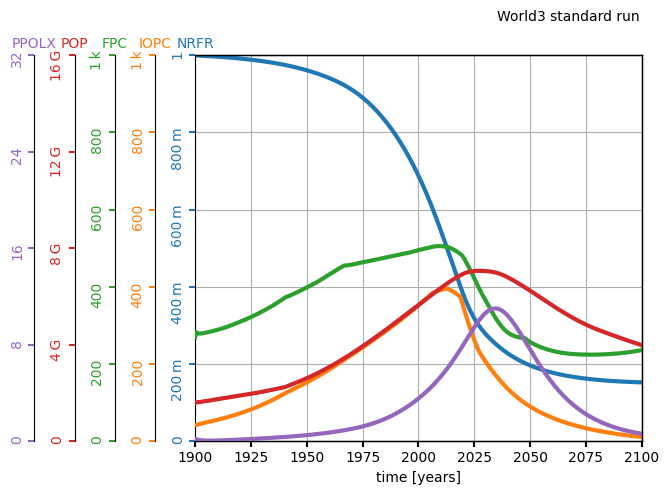

In [2]:
import pyworld3
pyworld3.hello_world3()

In [1]:
import json 
import networkx as nx 
import matplotlib.pyplot as plt
json_file = open('world3-03_variables.json') 
w3_vars = json.loads(json_file.read()) 
json_file.close() 
G = nx.DiGraph() 
for name, val in w3_vars.items(): 
    G.add_node(name, var_type=val['type']) 
    if val['dependencies'] != None: 
        G.add_edges_from([(dep, name) for dep in val['dependencies']]) 

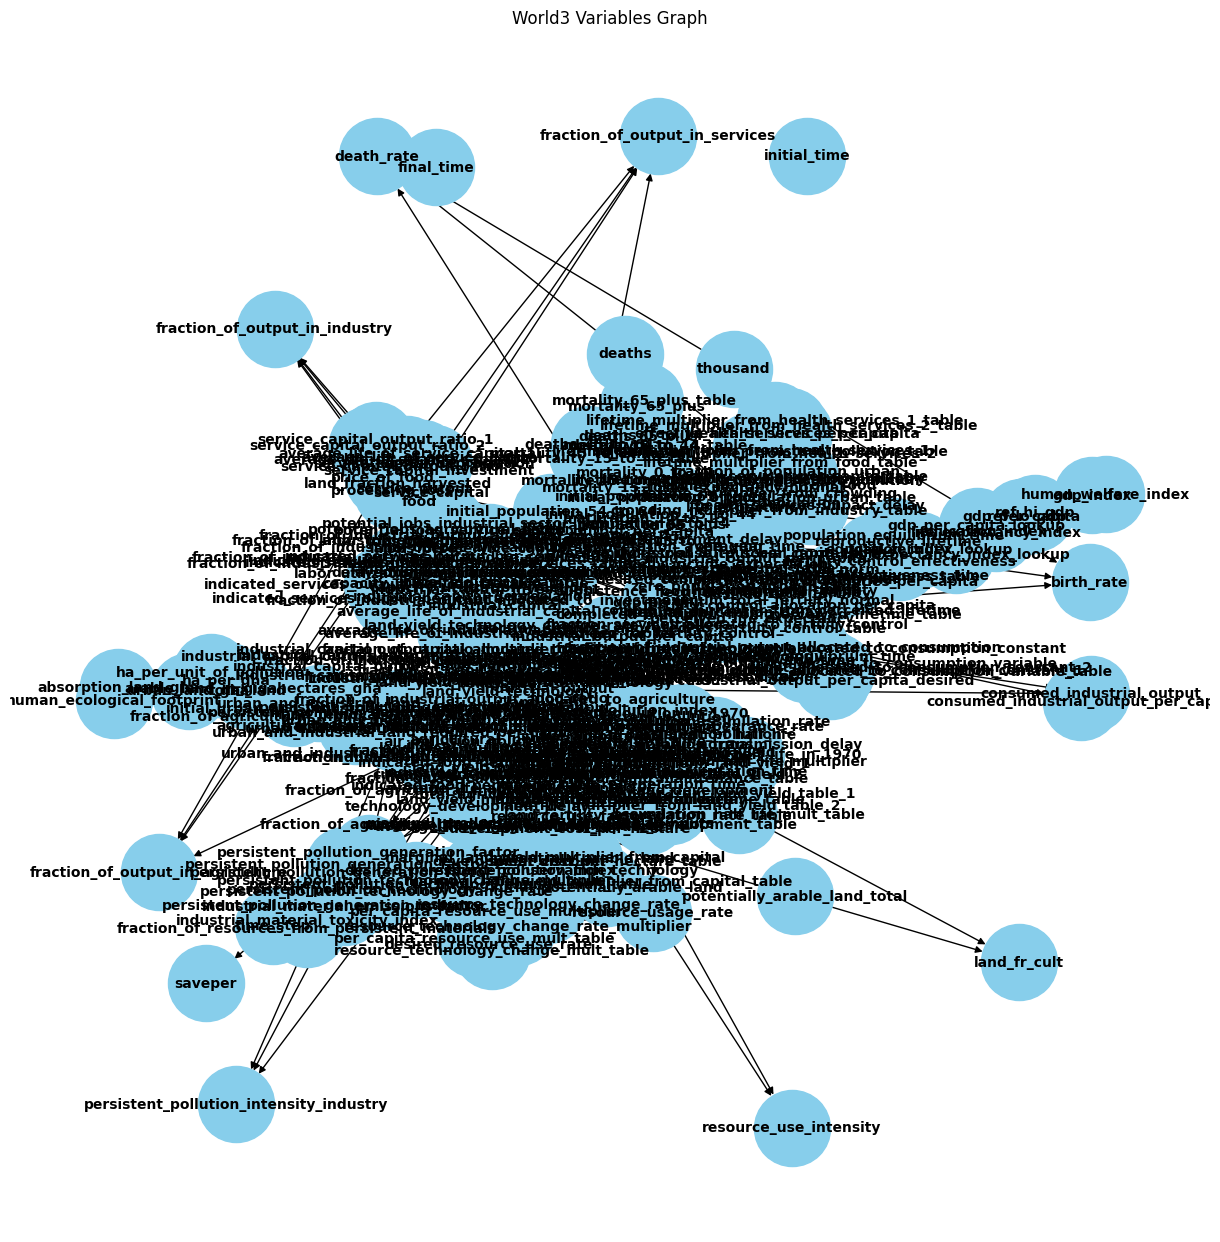

In [2]:
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title("World3 Variables Graph")
plt.show()

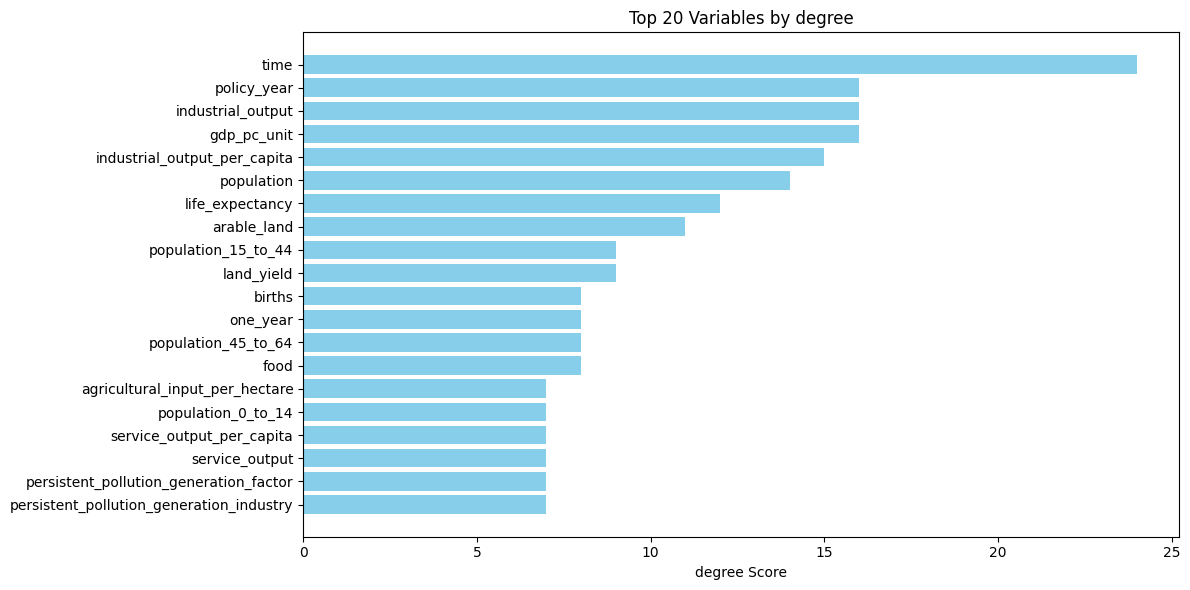

Top 10 nodes by Degree:
1. Node: time, Degree: 24
2. Node: policy_year, Degree: 16
3. Node: industrial_output, Degree: 16
4. Node: gdp_pc_unit, Degree: 16
5. Node: industrial_output_per_capita, Degree: 15
6. Node: population, Degree: 14
7. Node: life_expectancy, Degree: 12
8. Node: arable_land, Degree: 11
9. Node: population_15_to_44, Degree: 9
10. Node: land_yield, Degree: 9


In [14]:
degree = G.degree() 

# Take the top 20 nodes with the highest degree values
top20 = sorted(list(degree), key=lambda x: x[1], reverse=True)[:20]

# Extract the variable names and the corresponding eigenvector centrality values
labels, values = zip(*top20)

# Draw the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel('degree Score')
plt.title('Top 20 Variables by degree')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

# Sort nodes by degree from highest to lowest
sorted_degree = sorted(degree, key=lambda x: x[1], reverse=True)

# Output the top ten nodes
print("Top 10 nodes by Degree:")
for i, (node, deg) in enumerate(sorted_degree[:10]):
    print(f'{i + 1}. Node: {node}, Degree: {deg}')

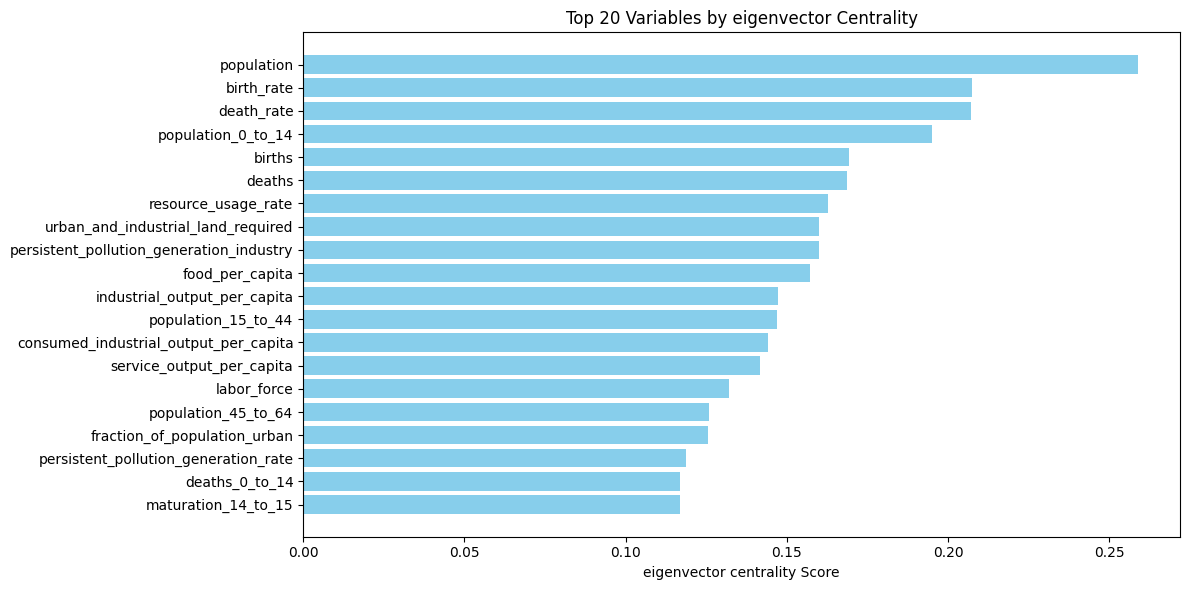

Top 10 nodes by Eigenvector Centrality:
1. Node: population, Eigenvector Centrality: 0.2589417755860784
2. Node: birth_rate, Eigenvector Centrality: 0.20743521334128348
3. Node: death_rate, Eigenvector Centrality: 0.20700497503018725
4. Node: population_0_to_14, Eigenvector Centrality: 0.19508675264957734
5. Node: births, Eigenvector Centrality: 0.16938457755539427
6. Node: deaths, Eigenvector Centrality: 0.16849485812923937
7. Node: resource_usage_rate, Eigenvector Centrality: 0.16268288205920656
8. Node: urban_and_industrial_land_required, Eigenvector Centrality: 0.15994157719853397
9. Node: persistent_pollution_generation_industry, Eigenvector Centrality: 0.15994157719853397
10. Node: food_per_capita, Eigenvector Centrality: 0.1571779584912618


In [10]:
# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Take the top 20 nodes with the highest eigenvector centrality values
top20 = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract the variable names and the corresponding eigenvector centrality values
labels, values = zip(*top20)

# Draw the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel('eigenvector centrality Score')
plt.title('Top 20 Variables by eigenvector Centrality')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

# Output feature vector centrality for each node
sorted_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Output the first 10 nodes and their eigenvector centrality
print("Top 10 nodes by Eigenvector Centrality:")
for i, (node, centrality) in enumerate(sorted_nodes[:10]):
    print(f'{i+1}. Node: {node}, Eigenvector Centrality: {centrality}')

# Katz centrality
# pagerank centrality

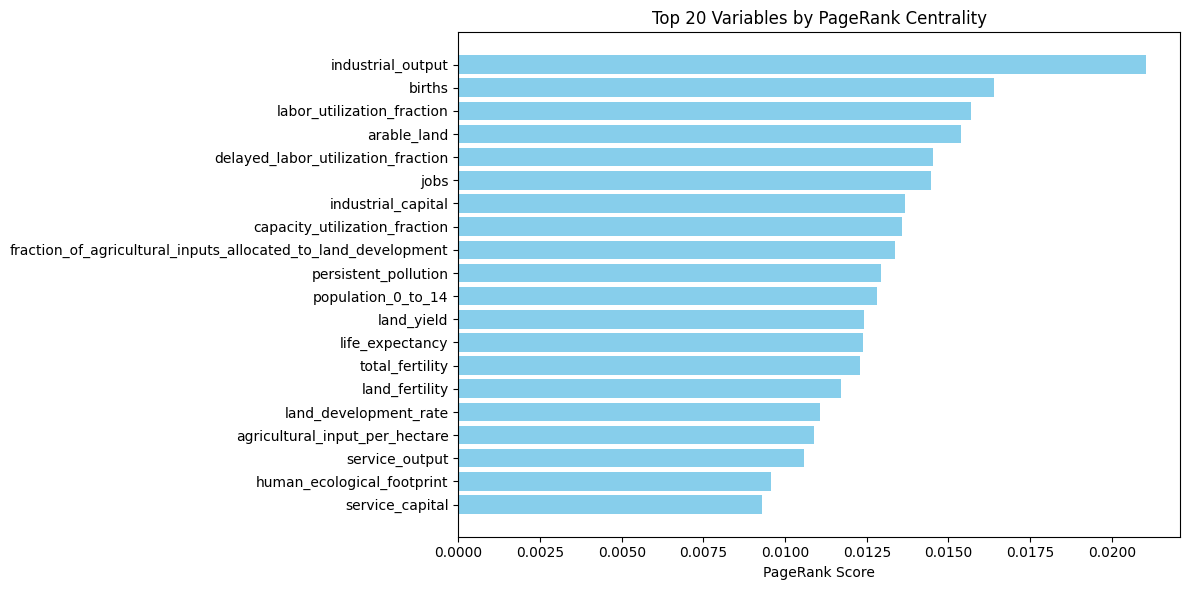

Top 10 nodes by pagerank Centrality:
1. Node: industrial_output, pagerank Centrality: 0.021034142808846377
2. Node: births, pagerank Centrality: 0.016404192084079606
3. Node: labor_utilization_fraction, pagerank Centrality: 0.015695508461405546
4. Node: arable_land, pagerank Centrality: 0.01537067465732528
5. Node: delayed_labor_utilization_fraction, pagerank Centrality: 0.014536982276401355
6. Node: jobs, pagerank Centrality: 0.01446225254643355
7. Node: industrial_capital, pagerank Centrality: 0.013678784707950073
8. Node: capacity_utilization_fraction, pagerank Centrality: 0.013572740617084309
9. Node: fraction_of_agricultural_inputs_allocated_to_land_development, pagerank Centrality: 0.01337155067156285
10. Node: persistent_pollution, pagerank Centrality: 0.012932003996700102


In [7]:
# pagerank centrality
pagerank = nx.pagerank(G)

# Take the top 20 nodes with the highest PageRank values
top20 = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract the variable names and the corresponding PageRank values
labels, values = zip(*top20)

# Draw the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel('PageRank Score')
plt.title('Top 20 Variables by PageRank Centrality')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

# Output the first 10 nodes and their pagerank centrality
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes by pagerank Centrality:")
for i, (node, centrality) in enumerate(sorted_pagerank[:10]):
    print(f'{i+1}. Node: {node}, pagerank Centrality: {centrality}')

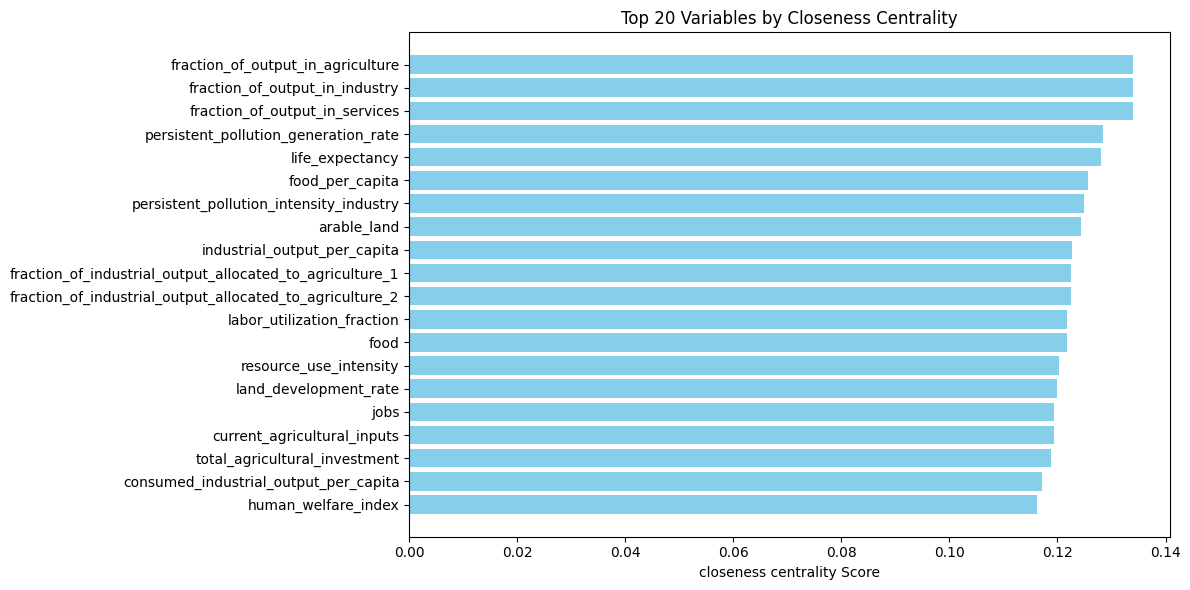

Top 10 nodes by Closeness Centrality:
Rank 1: Node: fraction_of_output_in_agriculture, Closeness Centrality: 0.13405800714701238
Rank 2: Node: fraction_of_output_in_industry, Closeness Centrality: 0.13405800714701238
Rank 3: Node: fraction_of_output_in_services, Closeness Centrality: 0.13405800714701238
Rank 4: Node: persistent_pollution_generation_rate, Closeness Centrality: 0.128411568086034
Rank 5: Node: life_expectancy, Closeness Centrality: 0.12808581575704864
Rank 6: Node: food_per_capita, Closeness Centrality: 0.12560056858564322
Rank 7: Node: persistent_pollution_intensity_industry, Closeness Centrality: 0.12493896493896493
Rank 8: Node: arable_land, Closeness Centrality: 0.1243631245601689
Rank 9: Node: industrial_output_per_capita, Closeness Centrality: 0.12273074519063824
Rank 10: Node: fraction_of_industrial_output_allocated_to_agriculture_1, Closeness Centrality: 0.12249254869342206


In [8]:
closeness = nx.closeness_centrality(G)

# Take the top 20 nodes with the highest PageRank values
top20 = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract the variable names and the corresponding PageRank values
labels, values = zip(*top20)

# Draw the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel('closeness centrality Score')
plt.title('Top 20 Variables by Closeness Centrality')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes by Closeness Centrality:")
for i, (node, centrality) in enumerate(sorted_closeness[:10]):
    print(f"Rank {i+1}: Node: {node}, Closeness Centrality: {centrality}")

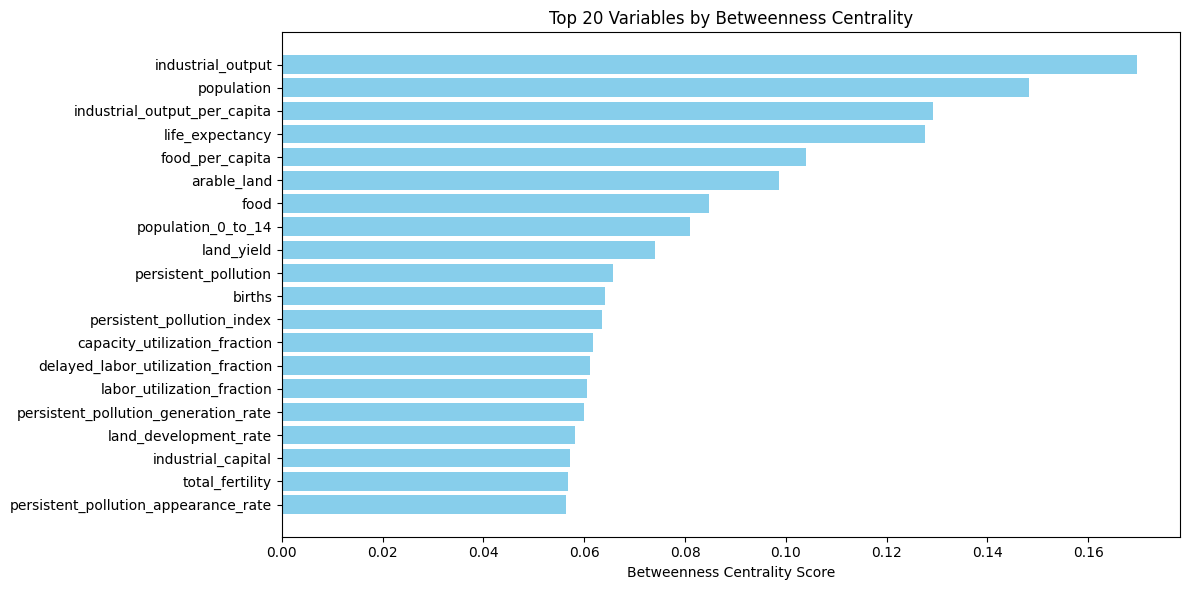

Top 10 nodes by Betweenness Centrality:
Rank 1: Node: industrial_output, Betweenness Centrality: 0.16971054358685825
Rank 2: Node: population, Betweenness Centrality: 0.14824373396693558
Rank 3: Node: industrial_output_per_capita, Betweenness Centrality: 0.1291646716387263
Rank 4: Node: life_expectancy, Betweenness Centrality: 0.1276261910942162
Rank 5: Node: food_per_capita, Betweenness Centrality: 0.1039276549176205
Rank 6: Node: arable_land, Betweenness Centrality: 0.0985631719071211
Rank 7: Node: food, Betweenness Centrality: 0.08480434353500771
Rank 8: Node: population_0_to_14, Betweenness Centrality: 0.08105819761028615
Rank 9: Node: land_yield, Betweenness Centrality: 0.0739561326685986
Rank 10: Node: persistent_pollution, Betweenness Centrality: 0.06575166938679225


In [9]:
# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Take the top 20 nodes with the highest Betweenness Centrality values
top20 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]

# Extract the variable names and the corresponding Betweenness Centrality values
labels, values = zip(*top20)

# Draw the bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel('Betweenness Centrality Score')
plt.title('Top 20 Variables by Betweenness Centrality')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

# Sort and output the top ten nodes according to Betweenness Centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Output the first ten nodes and their Betweenness Centrality
print("Top 10 nodes by Betweenness Centrality:")
for i, (node, centrality) in enumerate(sorted_betweenness[:10]):
    print(f"Rank {i+1}: Node: {node}, Betweenness Centrality: {centrality}")